# Introduction

For my final project in CSC 335 (Machine Learning) at Adelphi University, I am building a machine learning model that will be able to predict a song's popularity based on it's attributes. These attributes are defined by Spotify in their documentation here: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

The datasets I am using are from Kaggle: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db and https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs?resource=download

# Data Exploration

In [105]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [106]:
# Read in spotify data
spotify_data = pd.read_csv('SpotifyFeatures.csv', delimiter=",")
# Look at data
spotify_data

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


## Attribute Explanation
The attributes in the dataset are, with a brief explanation sourced by the Spotify API...:

* Acousticness: "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."

* Danceability: "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."

* Duration: "The duration of the track in milliseconds."

* Energy: "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy."

* Instrumentalness: "Predicts whether a track contains no vocals. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

* Key: "The key the track is in. Integers map to pitches using standard Pitch Class notation."

* Liveness: "Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."

* Loudness: "The overall loudness of a track in decibels (dB)."

* Mode: "Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."

* Speediness: "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

* Tempo: "The overall estimated tempo of a track in beats per minute (BPM)."

* Time Signature: "An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)."

* Valence: "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

* Popularity: How popular a song is, from 1 - 100. The higher the number, the more popular a song is.

In [107]:
# Read in chart data
chart_data = pd.read_csv("charts.csv", delimiter=',')
chart_data

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


## Data Set Creation
Let's combine these two datasets to get a cohesive grouping of information. We want to combine the data so that the track name/artist name are used as 'keys' in the combination. This will allow us to combine the song features with the chart data for analysis.

In [108]:
# Normalize column names for consistent matching
spotify_data['artist_name'] = spotify_data['artist_name'].str.lower()
spotify_data['track_name'] = spotify_data['track_name'].str.lower()

chart_data['artist'] = chart_data['artist'].str.lower()
chart_data['song'] = chart_data['song'].str.lower()

In [109]:
# Merge datasets on artist and track name
merged_data = pd.merge(
    spotify_data,
    chart_data,
    left_on=['artist_name', 'track_name'],
    right_on=['artist','song'],
    how='inner'
)

In [110]:
# Select relevant columns for the new dataset
song_data = merged_data[
    [
        'artist_name', 'track_name', 'rank', 'last-week', 'peak-rank',
        'weeks-on-board', 'date', 'popularity', 'acousticness',
        'danceability', 'duration_ms', 'energy', 'instrumentalness',
        'key', 'liveness', 'loudness', 'mode', 'speechiness',
        'tempo', 'time_signature', 'valence'
    ]
]

song_data

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,usher,you make me wanna...,49,50.0,2,47,1998-07-11,69,0.0359,0.761,...,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.922
1,usher,you make me wanna...,50,48.0,2,46,1998-07-04,69,0.0359,0.761,...,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.922
2,usher,you make me wanna...,48,42.0,2,45,1998-06-27,69,0.0359,0.761,...,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.922
3,usher,you make me wanna...,42,39.0,2,44,1998-06-20,69,0.0359,0.761,...,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.922
4,usher,you make me wanna...,39,41.0,2,43,1998-06-13,69,0.0359,0.761,...,0.639,0.000000,F,0.0945,-7.577,Minor,0.0539,164.088,4/4,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227145,mint condition,you don't have to hurt no more,32,34.0,32,5,1997-04-26,35,0.0973,0.758,...,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479
227146,mint condition,you don't have to hurt no more,34,37.0,34,4,1997-04-19,35,0.0973,0.758,...,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479
227147,mint condition,you don't have to hurt no more,37,42.0,37,3,1997-04-12,35,0.0973,0.758,...,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479
227148,mint condition,you don't have to hurt no more,42,52.0,42,2,1997-04-05,35,0.0973,0.758,...,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


Great! Now we have a complete dataset. With this, we can anaylyze how long a song will remain at the number one spot based on what type of song attributes it has. In other words, the question we want to answer is... *"What kind of musical attributes contribute to a song's longevity on the charts?"*

Before we go any further, let's make a data set that contains only the #1 Hits. This will help us analyze exactly what is common among these songs.

After, we'll start looking at some attributes in closer detail. To start off, let's look at my favorite artist :)

## Artist Deep-Dive

In [111]:
hits = song_data[song_data['rank']==1]
hits

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
64,mariah carey,hero,1,1.0,1,13,1994-01-15,71,0.7350,0.501,...,0.378,0.000000,E,0.1190,-9.370,Major,0.0290,119.987,4/4,0.178
65,mariah carey,hero,1,1.0,1,12,1994-01-08,71,0.7350,0.501,...,0.378,0.000000,E,0.1190,-9.370,Major,0.0290,119.987,4/4,0.178
66,mariah carey,hero,1,1.0,1,11,1994-01-01,71,0.7350,0.501,...,0.378,0.000000,E,0.1190,-9.370,Major,0.0290,119.987,4/4,0.178
67,mariah carey,hero,1,3.0,1,10,1993-12-25,71,0.7350,0.501,...,0.378,0.000000,E,0.1190,-9.370,Major,0.0290,119.987,4/4,0.178
133,tlc,creep,1,1.0,1,15,1995-02-18,68,0.0193,0.811,...,0.458,0.000001,F,0.0526,-9.688,Minor,0.0402,92.940,4/4,0.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225811,monica,the first night,1,1.0,1,9,1998-10-10,45,0.1390,0.671,...,0.766,0.000000,C#,0.2600,-9.218,Minor,0.0634,152.088,4/4,0.906
225812,monica,the first night,1,2.0,1,8,1998-10-03,45,0.1390,0.671,...,0.766,0.000000,C#,0.2600,-9.218,Minor,0.0634,152.088,4/4,0.906
227011,the shirelles,soldier boy,1,1.0,1,9,1962-05-19,41,0.7540,0.569,...,0.198,0.000200,A#,0.3310,-15.481,Major,0.0265,97.595,4/4,0.622
227012,the shirelles,soldier boy,1,1.0,1,8,1962-05-12,41,0.7540,0.569,...,0.198,0.000200,A#,0.3310,-15.481,Major,0.0265,97.595,4/4,0.622


In [112]:
# Let's start with Taylor Swift
taylor_songs = hits[hits['artist_name'].str.contains(
    'taylor swift', case=False, na=False)]
taylor_songs

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
15597,taylor swift,blank space,1,1.0,1,9,2015-01-10,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15598,taylor swift,blank space,1,1.0,1,8,2015-01-03,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15599,taylor swift,blank space,1,1.0,1,7,2014-12-27,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15600,taylor swift,blank space,1,1.0,1,6,2014-12-20,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15601,taylor swift,blank space,1,1.0,1,5,2014-12-13,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15602,taylor swift,blank space,1,1.0,1,4,2014-12-06,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15603,taylor swift,blank space,1,13.0,1,3,2014-11-29,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15621,taylor swift,look what you made me do,1,1.0,1,4,2017-09-30,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
15622,taylor swift,look what you made me do,1,1.0,1,3,2017-09-23,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
15623,taylor swift,look what you made me do,1,77.0,1,2,2017-09-16,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506


In [113]:
# Organize songs by date (recent to oldest) to see where she fares on the charts
taylor_songs = taylor_songs.sort_values(by=['rank', 'date'], ascending=[True, False])
taylor_songs

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
15621,taylor swift,look what you made me do,1,1.0,1,4,2017-09-30,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
104913,taylor swift,look what you made me do,1,1.0,1,4,2017-09-30,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
15622,taylor swift,look what you made me do,1,1.0,1,3,2017-09-23,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
104914,taylor swift,look what you made me do,1,1.0,1,3,2017-09-23,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
15623,taylor swift,look what you made me do,1,77.0,1,2,2017-09-16,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
104915,taylor swift,look what you made me do,1,77.0,1,2,2017-09-16,77,0.20400,0.766,...,0.709,0.000014,A,0.126,-6.471,Minor,0.1230,128.070,4/4,0.506
15597,taylor swift,blank space,1,1.0,1,9,2015-01-10,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
104977,taylor swift,blank space,1,1.0,1,9,2015-01-10,69,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
15598,taylor swift,blank space,1,1.0,1,8,2015-01-03,68,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583
104978,taylor swift,blank space,1,1.0,1,8,2015-01-03,69,0.08500,0.752,...,0.678,0.000002,F,0.130,-5.421,Major,0.0646,96.009,4/4,0.583


In [114]:
# Let's look at what her top hits have in common, feature wise!
musical_features = [
    'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

# Let's take a look at her summary statistics
taylor_stats = taylor_songs[musical_features].describe()

taylor_stats

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,69.029412,0.085956,0.707059,0.709353,0.000005,0.130353,-5.687588,0.107071,114.968118,0.689059
std,4.302820,0.061647,0.060411,0.044049,0.000006,0.011842,0.409154,0.040389,28.774125,0.167436
min,63.000000,0.009950,0.622000,0.678000,0.000000,0.112000,-6.471000,0.064600,86.035000,0.506000
25%,68.000000,0.056100,0.648000,0.678000,0.000002,0.126000,-5.891000,0.064600,96.009000,0.583000
50%,68.500000,0.085000,0.752000,0.682000,0.000002,0.130000,-5.421000,0.113000,96.009000,0.583000
75%,69.000000,0.085000,0.752000,0.709000,0.000011,0.130000,-5.421000,0.123000,128.070000,0.781000
max,77.000000,0.204000,0.766000,0.785000,0.000014,0.148000,-5.414000,0.165000,160.020000,0.943000


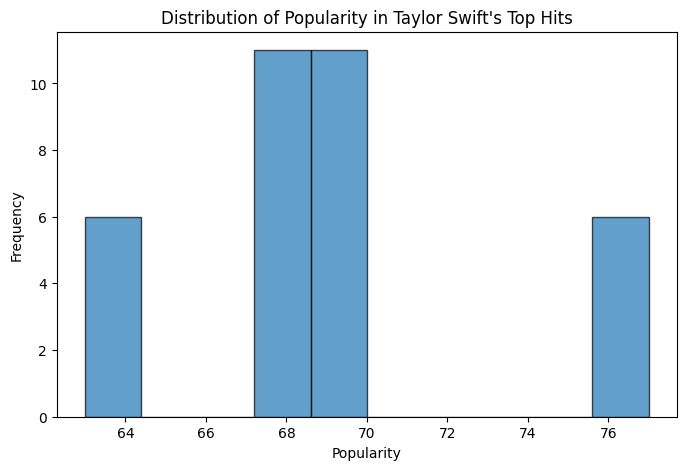

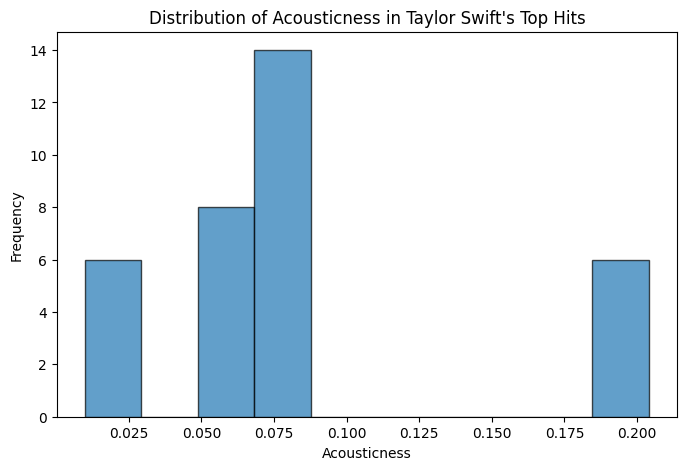

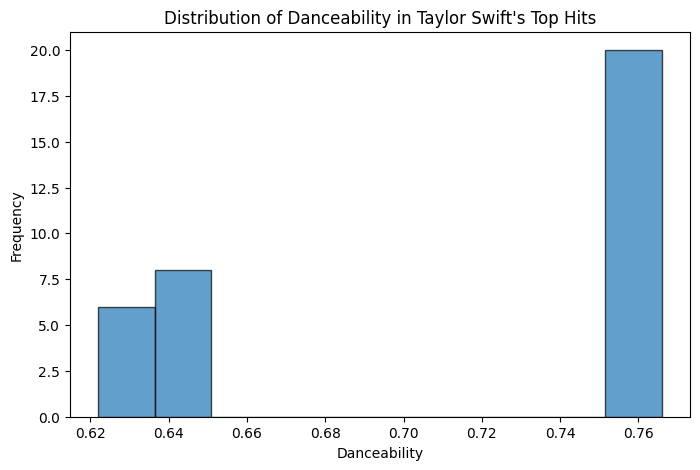

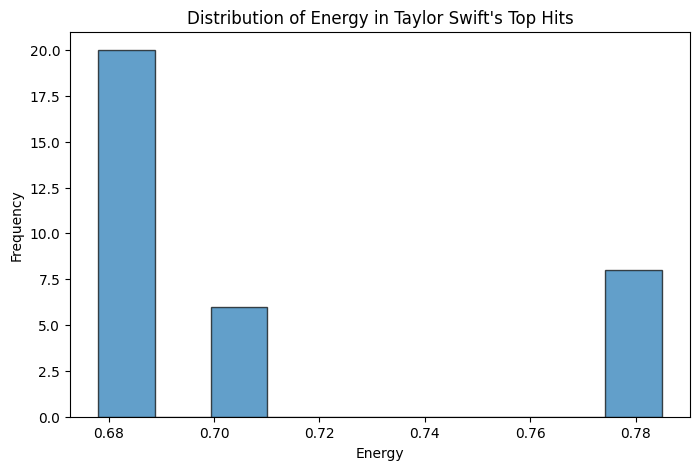

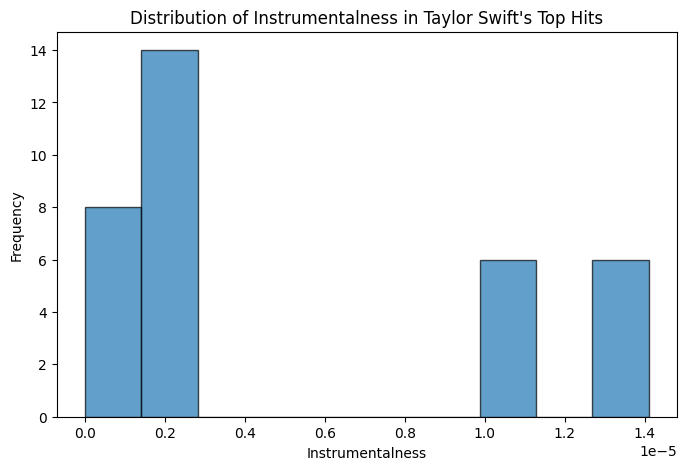

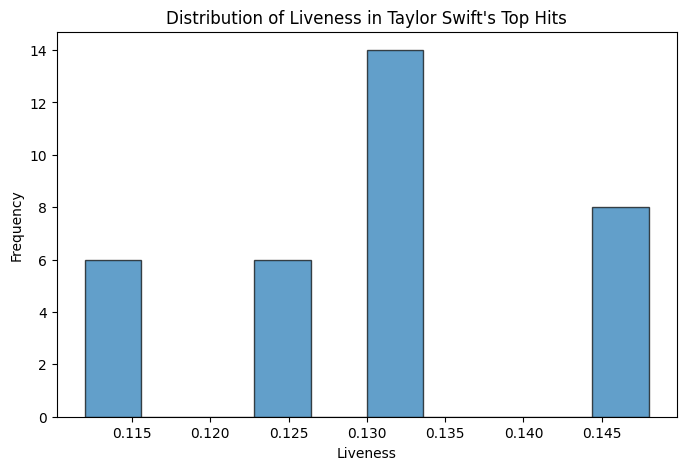

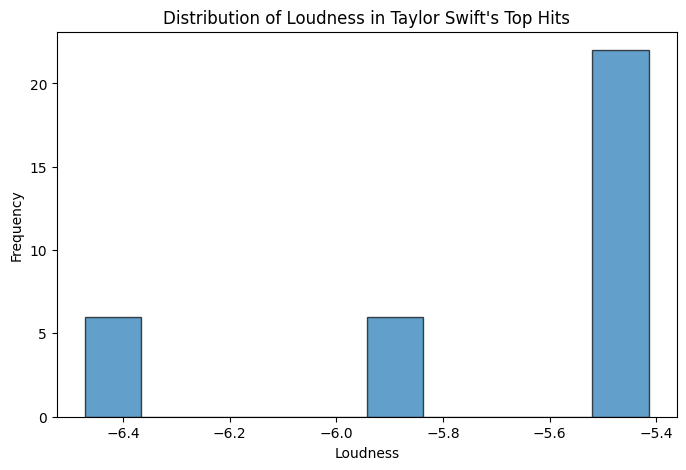

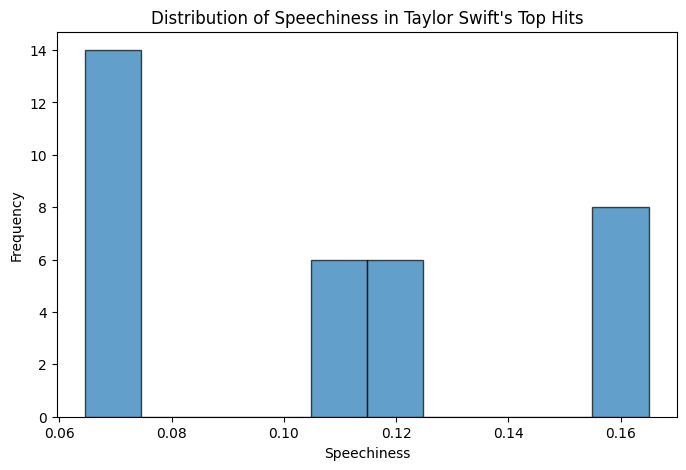

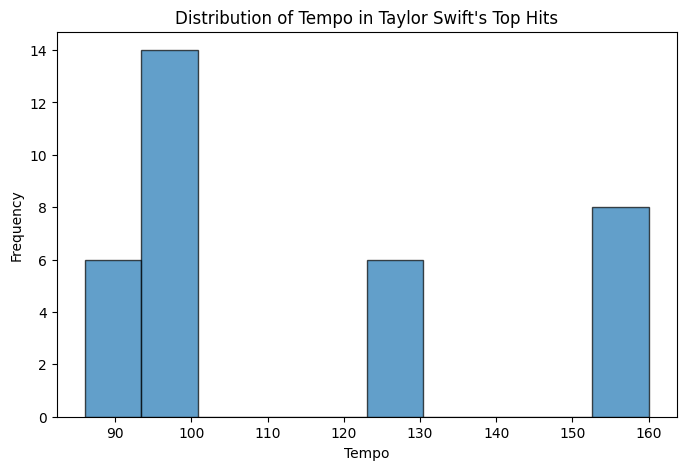

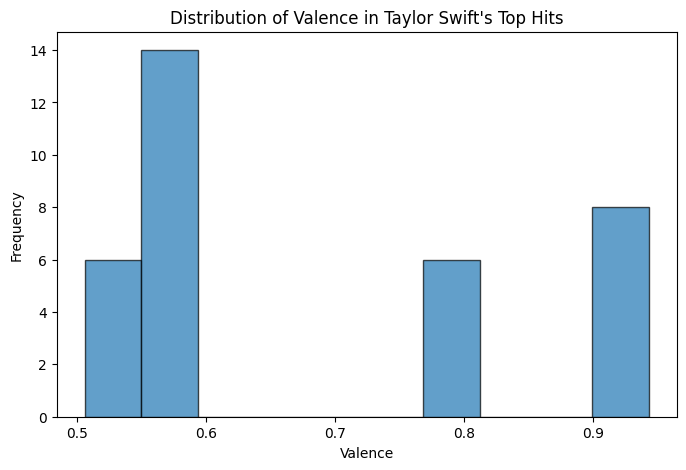

In [115]:
# Plot histograms for key features
for feature in musical_features:
    plt.figure(figsize=(8,5))
    plt.hist(taylor_songs[feature], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature.capitalize()} in Taylor Swift\'s Top Hits')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show

According to the charts:

* Popularity: Songs that were in the midranges of popularity within Swift's discography were the most likely to hit #1, particularly in the 68 - 70 range.

* Acousticness: Her #1 songs are generally not acoustic.

* Danceability: Songs with a higher danceability range were more present in the #1 spot than songs that were not danceable.

* Energy: Songs with higher energy (>0.6) were present on the #1 spot than those that had lower energy.

* Instrumentalness: A  majority of the #1 hits were not instrumental, that is to say, that they had lyrics.

* Liveness: A majority of Swift's #1 hits were lower on the liveness scale, indicating that studio versions of the song were more present on the charts.

* Loudness: Her #1 songs were all in the negative decibels, indicating that her songs were not very loud.

* Speechines: Surprisingly, songs with a lower speechiness were more frequent among her #1 hits. This is interesting, since the songs in the data set were not instrumentals.

* Tempo: The BPM of her songs varry, but the majority are around 100BPM.

* Valence: Songs with a valence of 0.5 - 0.6 were among her most popular, indicating that a balance between positive and negative enegy are preferred among fans.

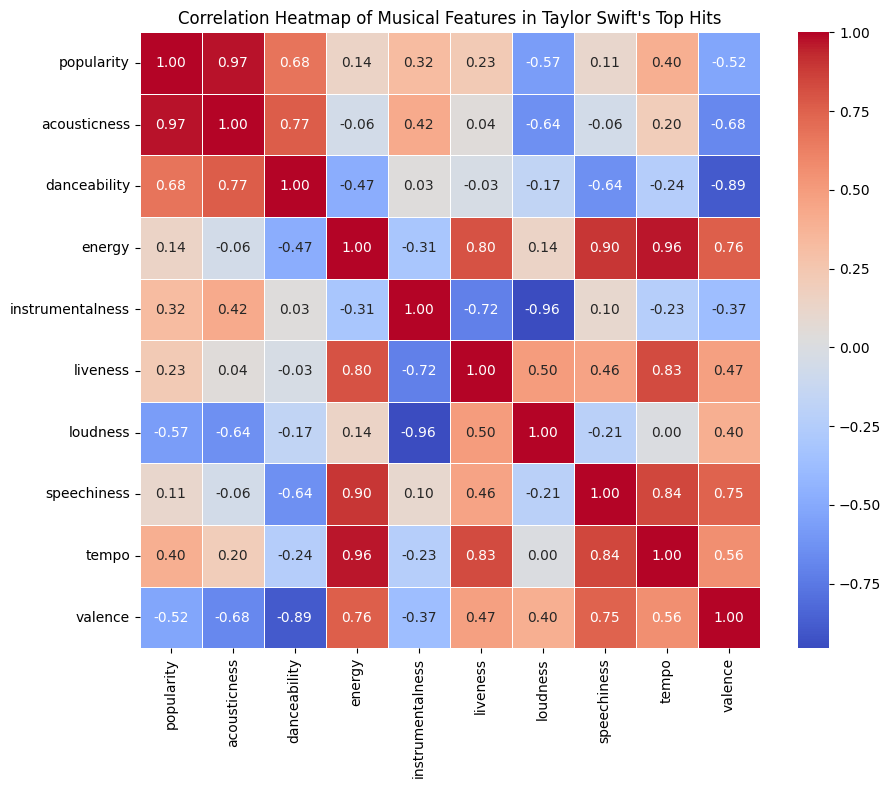

In [116]:
# Let's also take a look at a correlation matrix
plt.figure(figsize=(10,8))
correlation_matrix = taylor_songs[musical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Musical Features in Taylor Swift\'s Top Hits')
plt.show()

According to the heatmap:

* There is a high positive correlation between acousticness and popularity. While this is surprising given her popstar status, a majority of her works are country/folk adjacent and thus, do not have the heavy production values present in pop music.

* There is also a moderately positive correlation between danceability and populatity, suggesting that songs that are easier to dance to are more likely to go #1.

* There is a moderately negative correlation between popularity and loudness/valence. It appears that high energy songs and overtly positive songs are not her most popular!

Let's see if the overall data follows similar trends! First, let's take a look at how accousticness and danceability change over the years for #1 hits. Taylor Swift's fame is attributed to her work in the early 2000s to present day. It would be interesting to see if this pattern was present already. Maybe Swift knows the trick to securing that #1 spot, or if there is another reaosn why her songs were so popular.

## Overall Analysis

/var/folders/bz/137n6bh51t7g3t8plg29ft000000gn/T/ipykernel_14915/1271665684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits['date'] = pd.to_datetime(hits['date'])
/var/folders/bz/137n6bh51t7g3t8plg29ft000000gn/T/ipykernel_14915/1271665684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits['year'] = hits['date'].dt.year


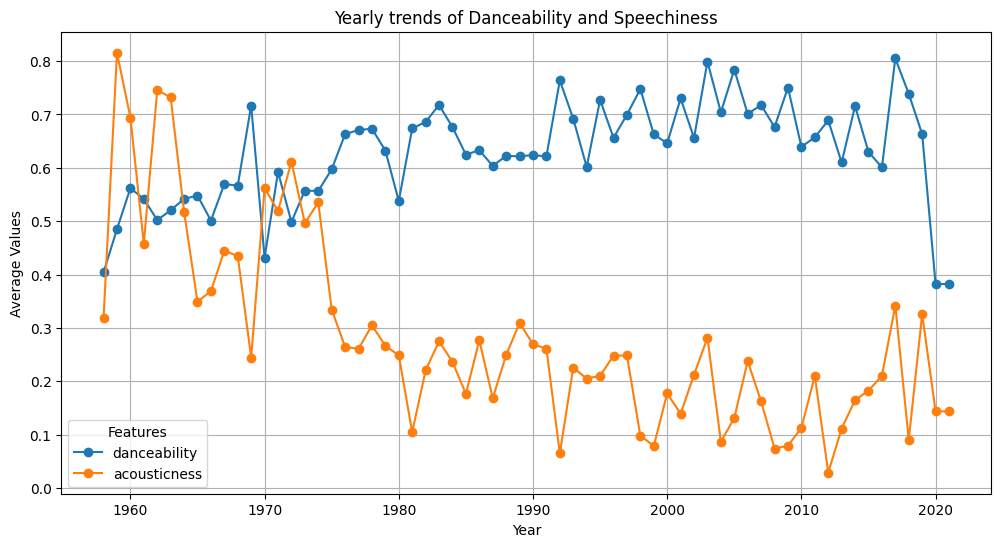

In [117]:
# Group songs by year and calculate mean of selected features
hits['date'] = pd.to_datetime(hits['date'])
hits['year'] = hits['date'].dt.year
yearly_trends = hits.groupby('year')[['danceability', 'acousticness']].mean()

# Plot
yearly_trends.plot(figsize=(12,6), marker='o')
plt.title('Yearly trends of Danceability and Speechiness')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.legend(title='Features')
plt.grid(True)
plt.show()

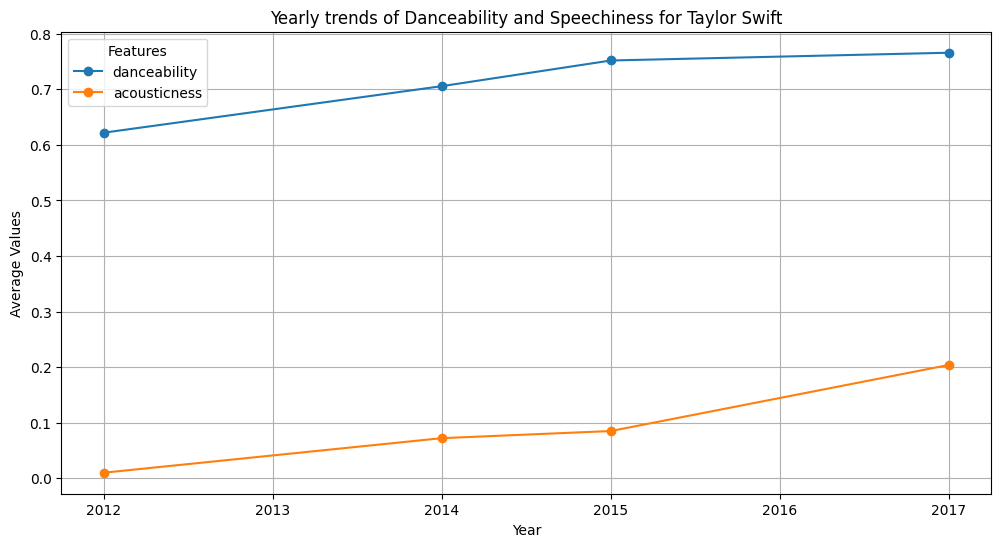

In [118]:
# Group songs by year and calculate mean of selected features
taylor_songs['date'] = pd.to_datetime(taylor_songs['date'])
taylor_songs['year'] = taylor_songs['date'].dt.year
yearly_trends_tay = taylor_songs.groupby(
    'year')[['danceability', 'acousticness']].mean()

# Plot
yearly_trends_tay.plot(figsize=(12, 6), marker='o')
plt.title('Yearly trends of Danceability and Speechiness for Taylor Swift')
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.legend(title='Features')
plt.grid(True)
plt.show()

Interestingly enough, both charts show that danceability and acousticness have an inverse relationship. As danceability increases, acousticness tends to decrease. Both charts show a trend toward higher danceability over time, which suggests that both the music industry and Taylor Swift have been moving toward more rhythmically engaging music. Does this mean Taylor cracked the code? Or was she just following along with general trends? Let's take a look at other artists...

## Top 10 Artist Dive

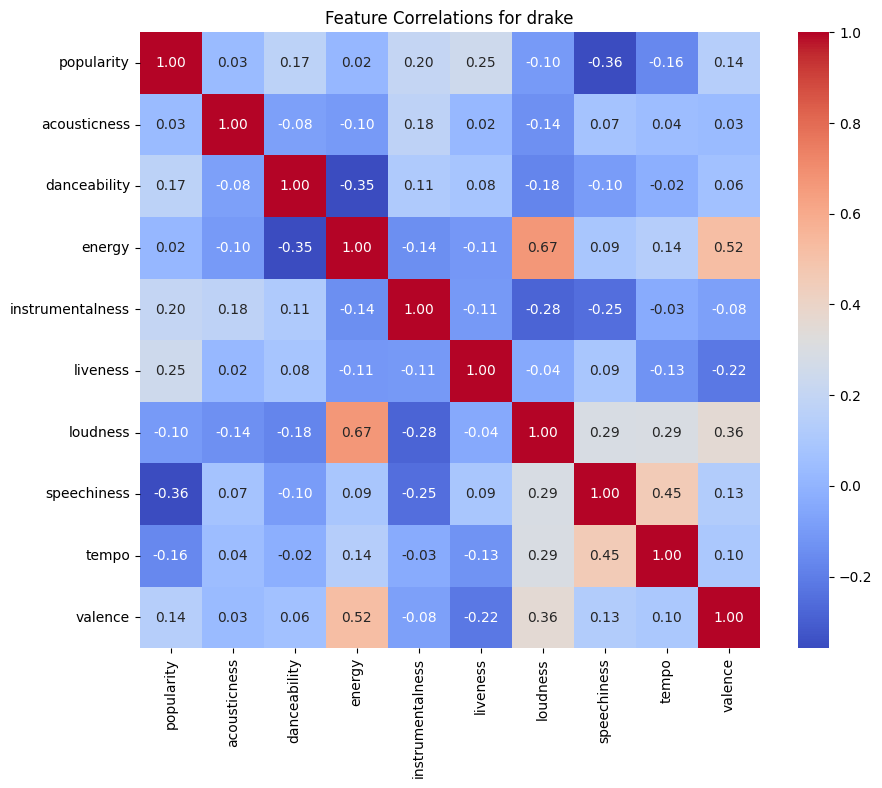

Features positively correlated with popularity for drake:
popularity          1.000000
liveness            0.246012
instrumentalness    0.203812
danceability        0.167675
valence             0.144220
acousticness        0.032958
energy              0.015446
Name: popularity, dtype: float64




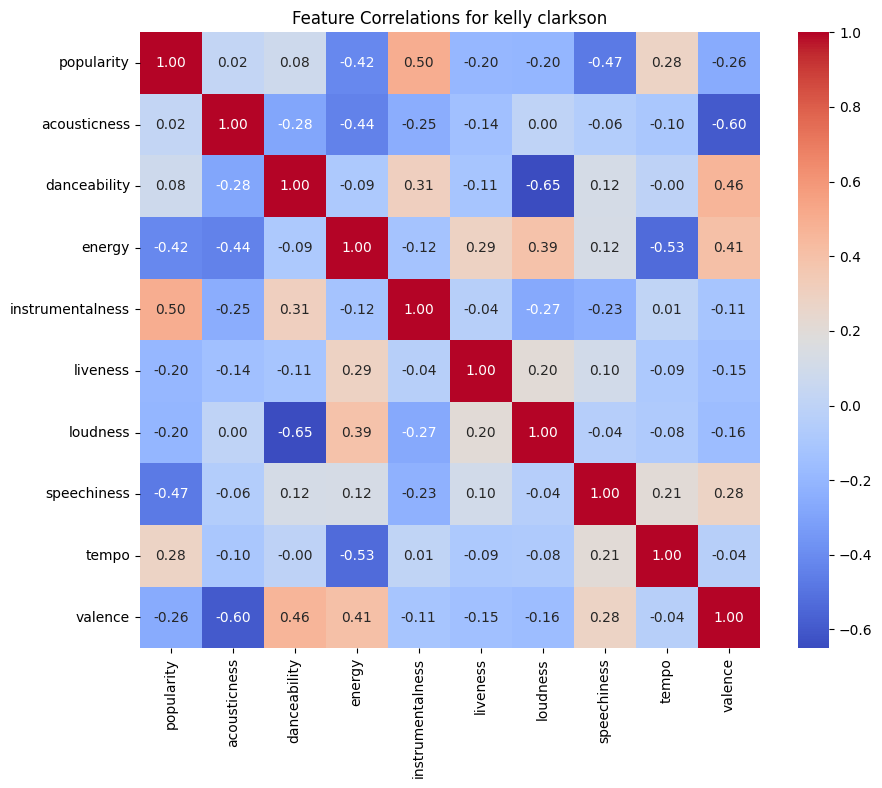

Features positively correlated with popularity for kelly clarkson:
popularity          1.000000
instrumentalness    0.497301
tempo               0.279627
danceability        0.078953
acousticness        0.024052
Name: popularity, dtype: float64




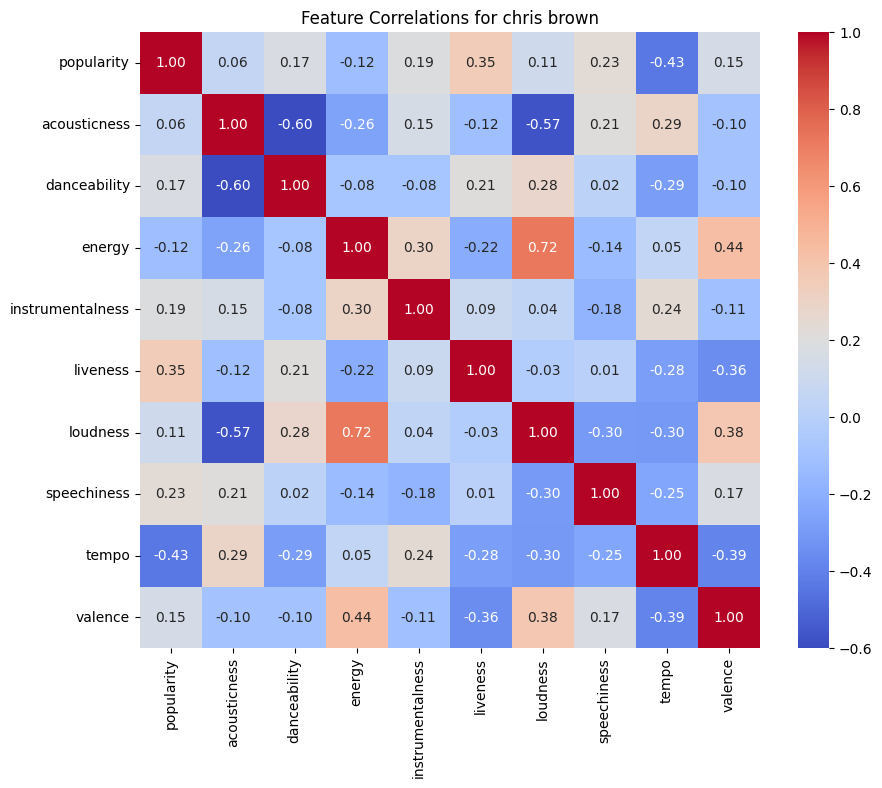

Features positively correlated with popularity for chris brown:
popularity          1.000000
liveness            0.353227
speechiness         0.234792
instrumentalness    0.191905
danceability        0.171892
valence             0.149063
loudness            0.113632
acousticness        0.058974
Name: popularity, dtype: float64




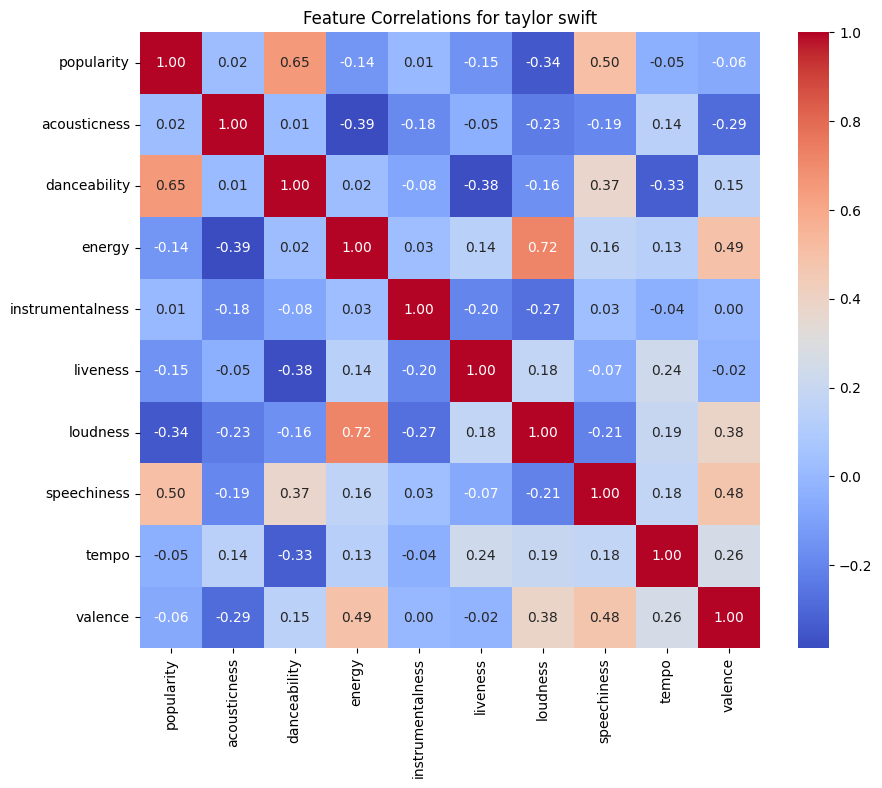

Features positively correlated with popularity for taylor swift:
popularity          1.000000
danceability        0.650228
speechiness         0.502385
acousticness        0.021666
instrumentalness    0.008517
Name: popularity, dtype: float64




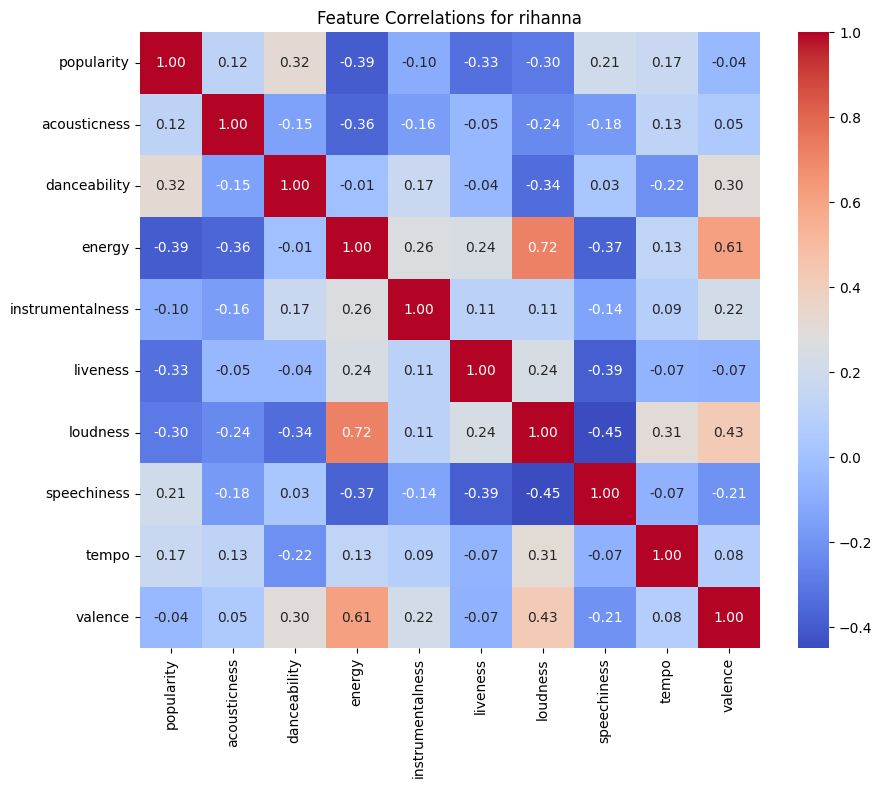

Features positively correlated with popularity for rihanna:
popularity      1.000000
danceability    0.317011
speechiness     0.205115
tempo           0.170277
acousticness    0.117594
Name: popularity, dtype: float64




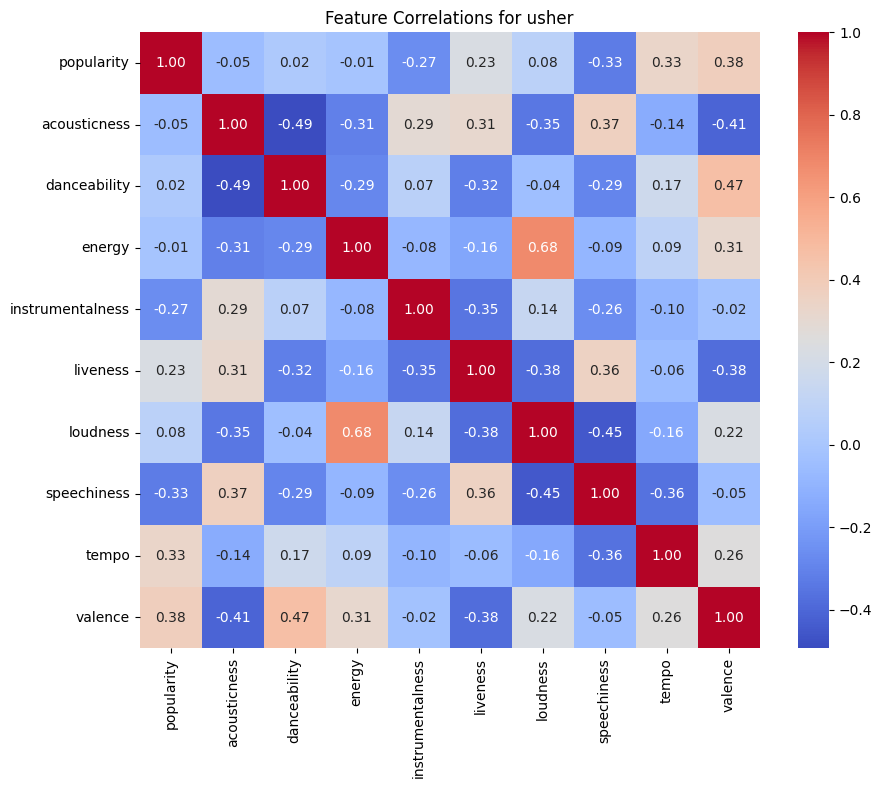

Features positively correlated with popularity for usher:
popularity      1.000000
valence         0.375809
tempo           0.334497
liveness        0.225323
loudness        0.083027
danceability    0.023439
Name: popularity, dtype: float64




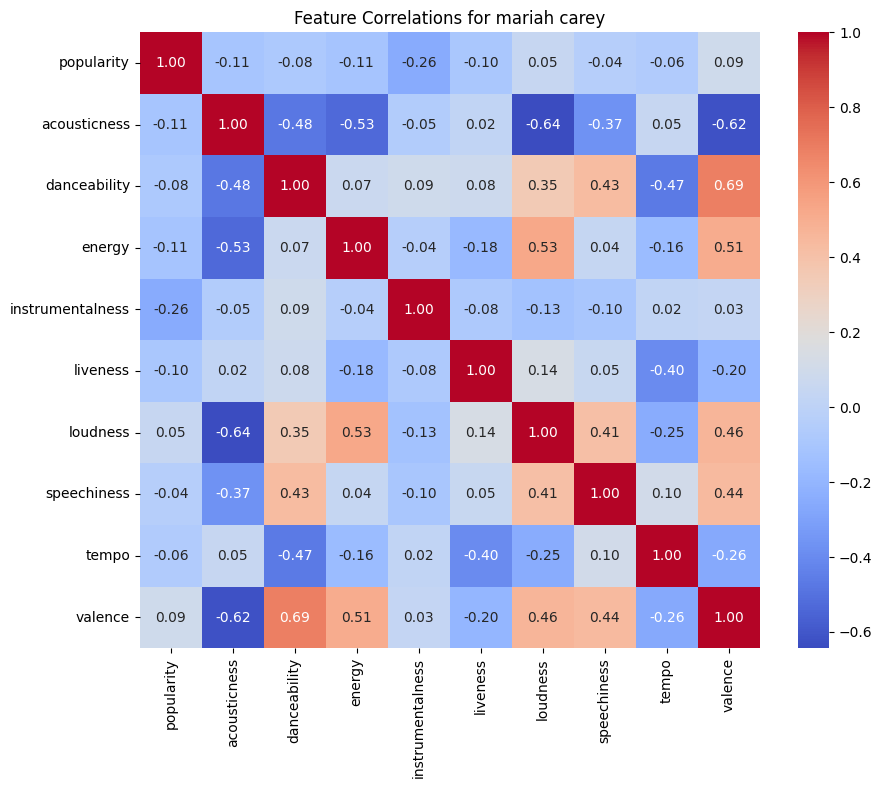

Features positively correlated with popularity for mariah carey:
popularity    1.000000
valence       0.091279
loudness      0.049653
Name: popularity, dtype: float64




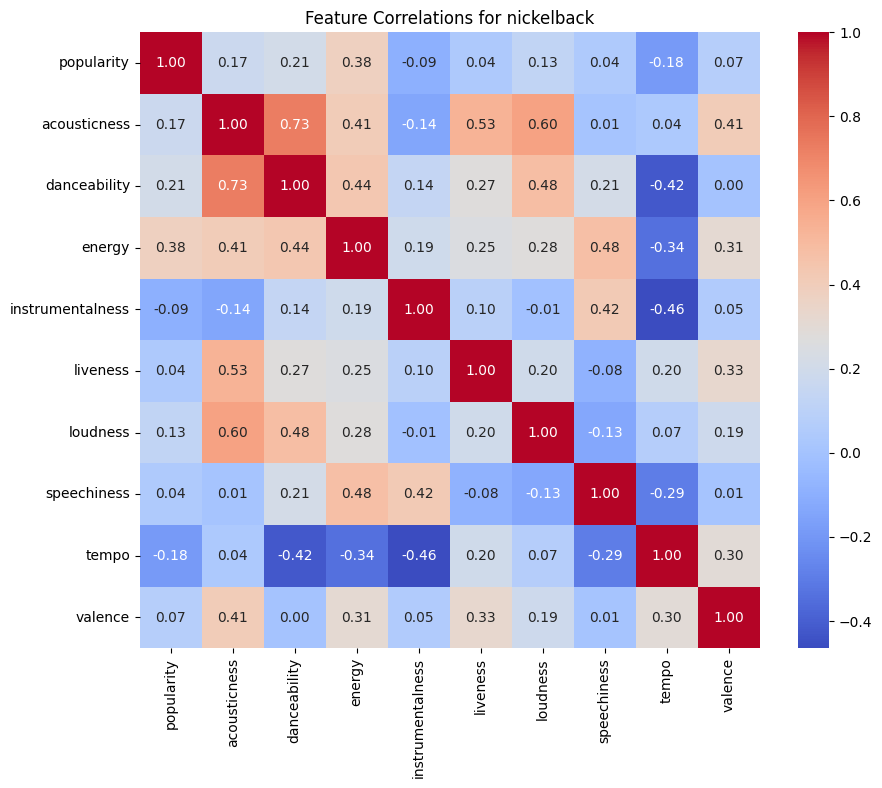

Features positively correlated with popularity for nickelback:
popularity      1.000000
energy          0.379611
danceability    0.209656
acousticness    0.171282
loudness        0.128652
valence         0.073118
speechiness     0.044493
liveness        0.043393
Name: popularity, dtype: float64




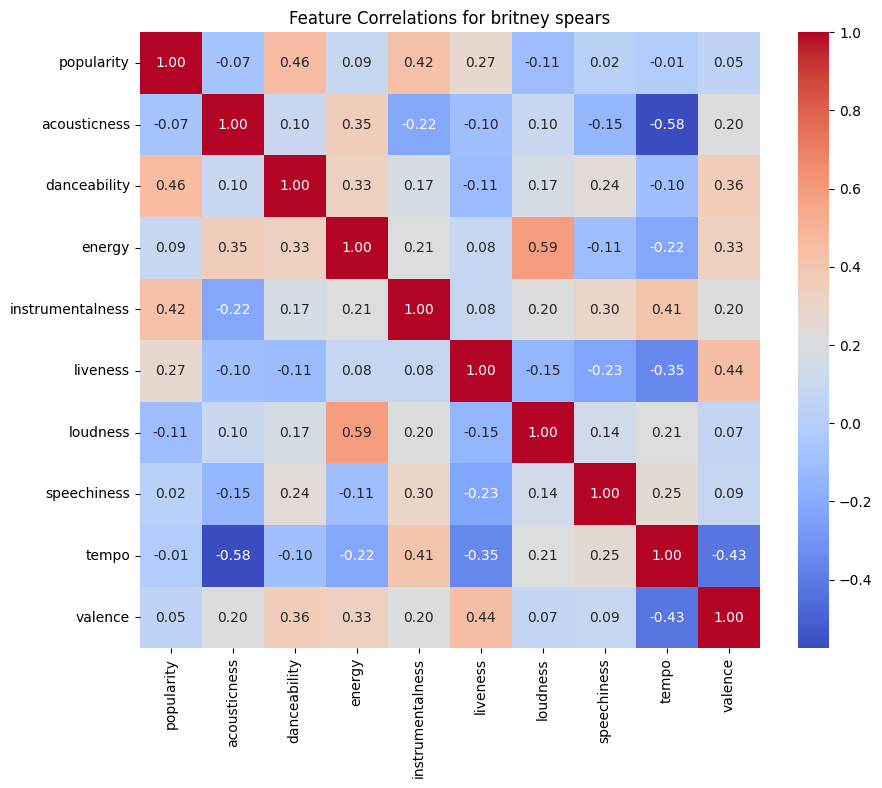

Features positively correlated with popularity for britney spears:
popularity          1.000000
danceability        0.455361
instrumentalness    0.424424
liveness            0.270228
energy              0.092470
valence             0.046715
speechiness         0.018831
Name: popularity, dtype: float64




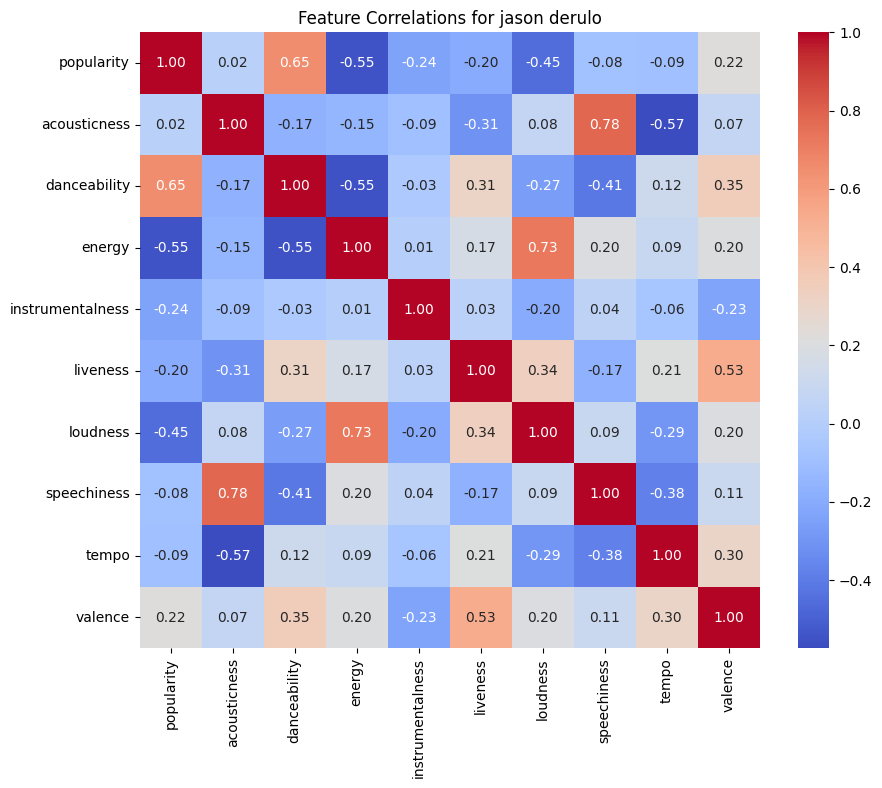

Features positively correlated with popularity for jason derulo:
popularity      1.000000
danceability    0.653896
valence         0.221107
acousticness    0.019318
Name: popularity, dtype: float64




In [119]:
# Filter for popular artists (e.g., artists with more than a certain number of entries in the dataset)
popular_artists = merged_data['artist'].value_counts().head(10).index.tolist()

# Loop through each popular artist
for artist in popular_artists:
    # Filter data for the current artist
    artist_data = merged_data[merged_data['artist'] == artist]
    
    # Select only numeric columns for correlation
    corr_matrix = artist_data[musical_features].corr()

    # Plot a heatmap for the artist
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Feature Correlations for {artist}')
    plt.show()

    # Determine which features have a positive correlation to popularity
    popularity_corr = corr_matrix['popularity']
    positive_corr = popularity_corr[popularity_corr > 0].sort_values(
        ascending=False)
    print(f"Features positively correlated with popularity for {artist}:")
    print(positive_corr)
    print("\n")

Unsurprisingly, there is not a consistent answer for what makes a song go viral or not. While Taylor Swift's music had a very clear answer as to what made her number 1 hits stand out, other artists are not that easy to read. Jason Derulo had a high positive correlation with danceability (much like Swift), but Nickleback achieved the same #1 spots without high danceability scores. There is much more that goes into chart domination than just musical features. Let's think about some other factors that can affect a song:

* General artist popularity in the media

* Monthly or seasonality trends (holiday hits)

* Trends over decades versus modern trends

* Was this a breakout hit? Is the artist releasing music that sounds the same as the rest of their catalog?

## Feature Engineering

There are so many aspects that determine if a song will go viral. To help us, let's add some new features. The features we will be adding will include:

* Chart Month (to determine if it is a holiday or summer hit)

* Chart Day of the Week (if songs on a certain day perform better than others)

* Seasons based on chart date

* Musical era (1980s, 1990s, 2000s)

* Holiday Flag (Determine if a song was charting near a major holiday like Christmas, New Years, etc)

Let's add all these features!

In [120]:
# Assuming `song_data` has a `date` column
song_data['date'] = pd.to_datetime(song_data['date'])

# Chart Month
song_data['chart_month'] = song_data['date'].dt.month

# Chart Day of the Week
song_data['chart_day_of_week'] = song_data['date'].dt.day_name()

# Seasons Based on Charting Date
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


song_data['chart_season'] = song_data['chart_month'].apply(get_season)

# Musical Era
def get_musical_era(year):
    if year < 1990:
        return '1980s and Earlier'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    else:
        return '2020s'


song_data['musical_era'] = song_data['date'].dt.year.apply(get_musical_era)

# Holiday Flag
holidays = {
    "Christmas": [(12, 25)],
    "New Year": [(1, 1)],
    "Thanksgiving": [(11, 22), (11, 23), (11, 24)],
    "Independence Day": [(7, 4)],
    "Valentine's Day": [(2, 14)]
}


def is_holiday(date):
    month = date.month
    day = date.day
    for holiday, dates in holidays.items():
        if (month, day) in dates:
            return True
    return False


song_data['holiday_flag'] = song_data['date'].apply(is_holiday)

# Display the dataset with new features
song_data

/var/folders/bz/137n6bh51t7g3t8plg29ft000000gn/T/ipykernel_14915/3344011271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['date'] = pd.to_datetime(song_data['date'])
/var/folders/bz/137n6bh51t7g3t8plg29ft000000gn/T/ipykernel_14915/3344011271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data['chart_month'] = song_data['date'].dt.month
/var/folders/bz/137n6bh51t7g3t8plg29ft000000gn/T/ipykernel_14915/3344011271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,mode,speechiness,tempo,time_signature,valence,chart_month,chart_day_of_week,chart_season,musical_era,holiday_flag
0,usher,you make me wanna...,49,50.0,2,47,1998-07-11,69,0.0359,0.761,...,Minor,0.0539,164.088,4/4,0.922,7,Saturday,Summer,1990s,False
1,usher,you make me wanna...,50,48.0,2,46,1998-07-04,69,0.0359,0.761,...,Minor,0.0539,164.088,4/4,0.922,7,Saturday,Summer,1990s,True
2,usher,you make me wanna...,48,42.0,2,45,1998-06-27,69,0.0359,0.761,...,Minor,0.0539,164.088,4/4,0.922,6,Saturday,Summer,1990s,False
3,usher,you make me wanna...,42,39.0,2,44,1998-06-20,69,0.0359,0.761,...,Minor,0.0539,164.088,4/4,0.922,6,Saturday,Summer,1990s,False
4,usher,you make me wanna...,39,41.0,2,43,1998-06-13,69,0.0359,0.761,...,Minor,0.0539,164.088,4/4,0.922,6,Saturday,Summer,1990s,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227145,mint condition,you don't have to hurt no more,32,34.0,32,5,1997-04-26,35,0.0973,0.758,...,Minor,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False
227146,mint condition,you don't have to hurt no more,34,37.0,34,4,1997-04-19,35,0.0973,0.758,...,Minor,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False
227147,mint condition,you don't have to hurt no more,37,42.0,37,3,1997-04-12,35,0.0973,0.758,...,Minor,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False
227148,mint condition,you don't have to hurt no more,42,52.0,42,2,1997-04-05,35,0.0973,0.758,...,Minor,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False


## Feature Analysis pt. 2

Let's now take a look at each of these new features. To start with, let's see what type of features were popular in each musical era!

<Figure size 1400x800 with 0 Axes>

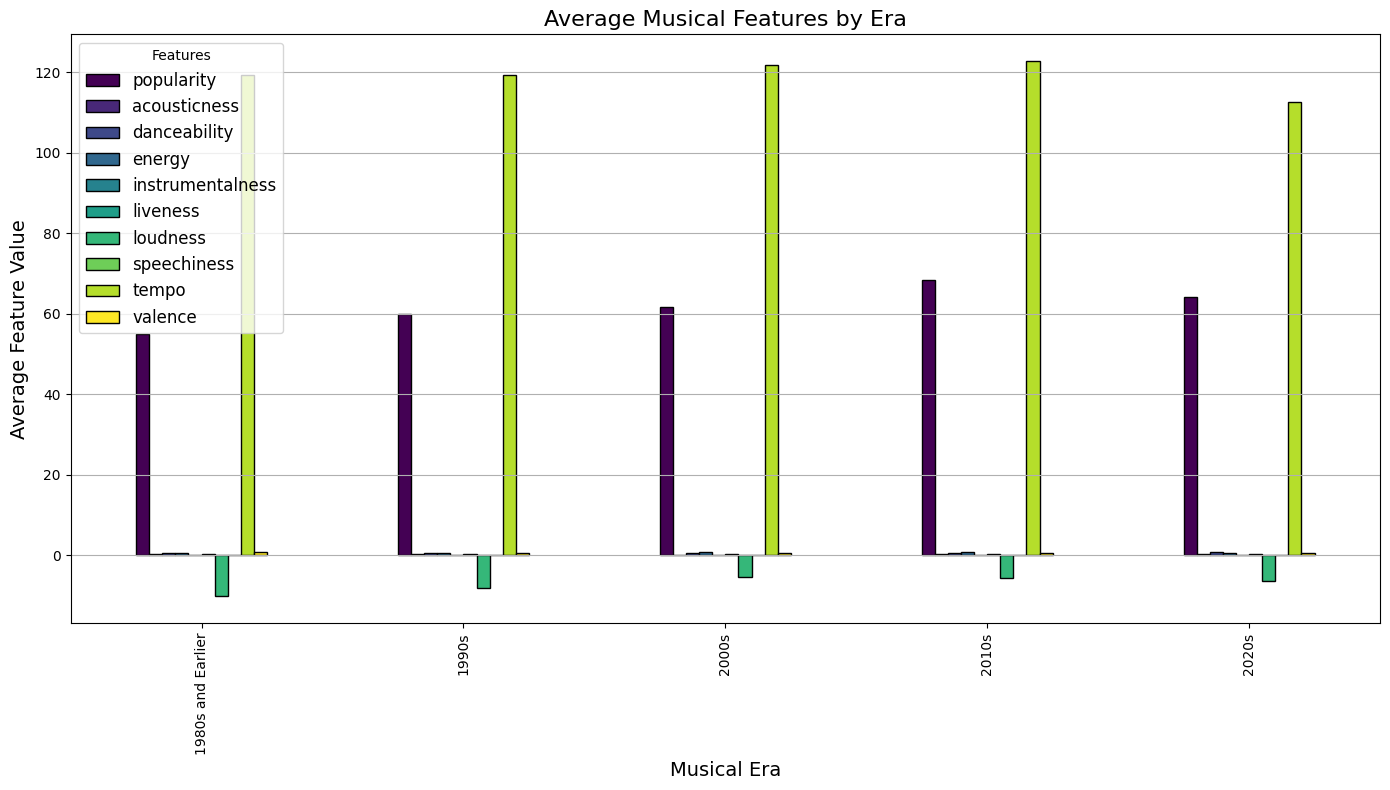

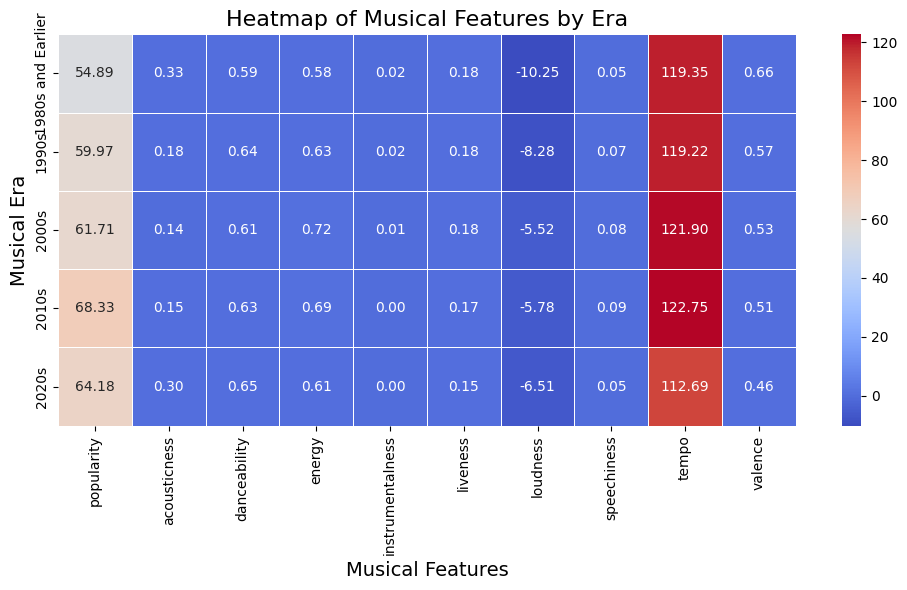

In [121]:
era_features = song_data.groupby('musical_era')[musical_features].mean()

# Visualize the features for each era
plt.figure(figsize=(14, 8))
era_features.plot(kind='bar', figsize=(14, 8),
                  colormap='viridis', edgecolor='black')
plt.title('Average Musical Features by Era', fontsize=16)
plt.xlabel('Musical Era', fontsize=14)
plt.ylabel('Average Feature Value', fontsize=14)
plt.legend(title='Features', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Heatmap for a detailed view of feature variations
plt.figure(figsize=(10, 6))
sns.heatmap(era_features, annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Musical Features by Era', fontsize=16)
plt.xlabel('Musical Features', fontsize=14)
plt.ylabel('Musical Era', fontsize=14)
plt.tight_layout()
plt.show()

Some key observations from the heatmap:

* Hit Songs were more acoustic in the 1980s and 2020s compared to other eras.

* Deanceability has been steadily increasing each era. 

* While energy levels peaked in the 2000s, the 2020s saw a slight decrease. This suggests that high intensity tracks might not be as favorted.

* Similarly, loudness had a slight decrease in the 2020s.

* Songs were happier (higher valence) in earlier eras while steadily decreasing over time. Tracks in the 2020s were the least positive, reflecting a shift towards darker or moodier themes.

Insights:

* The 2010s were the peak for high-energy tracks, reflecting the pop dominated nature of the time.

* The 2020s show a resurgence in acoustic music and lower tempos, likely due to external influences (COVID-19 Pandemic) on listener preferences.

* The decline in valence over time might indicate changing cultural themes in music, with more demand for introspective tracks.

Now, let's take a look at songs around the holidays! 

<Figure size 1400x800 with 0 Axes>

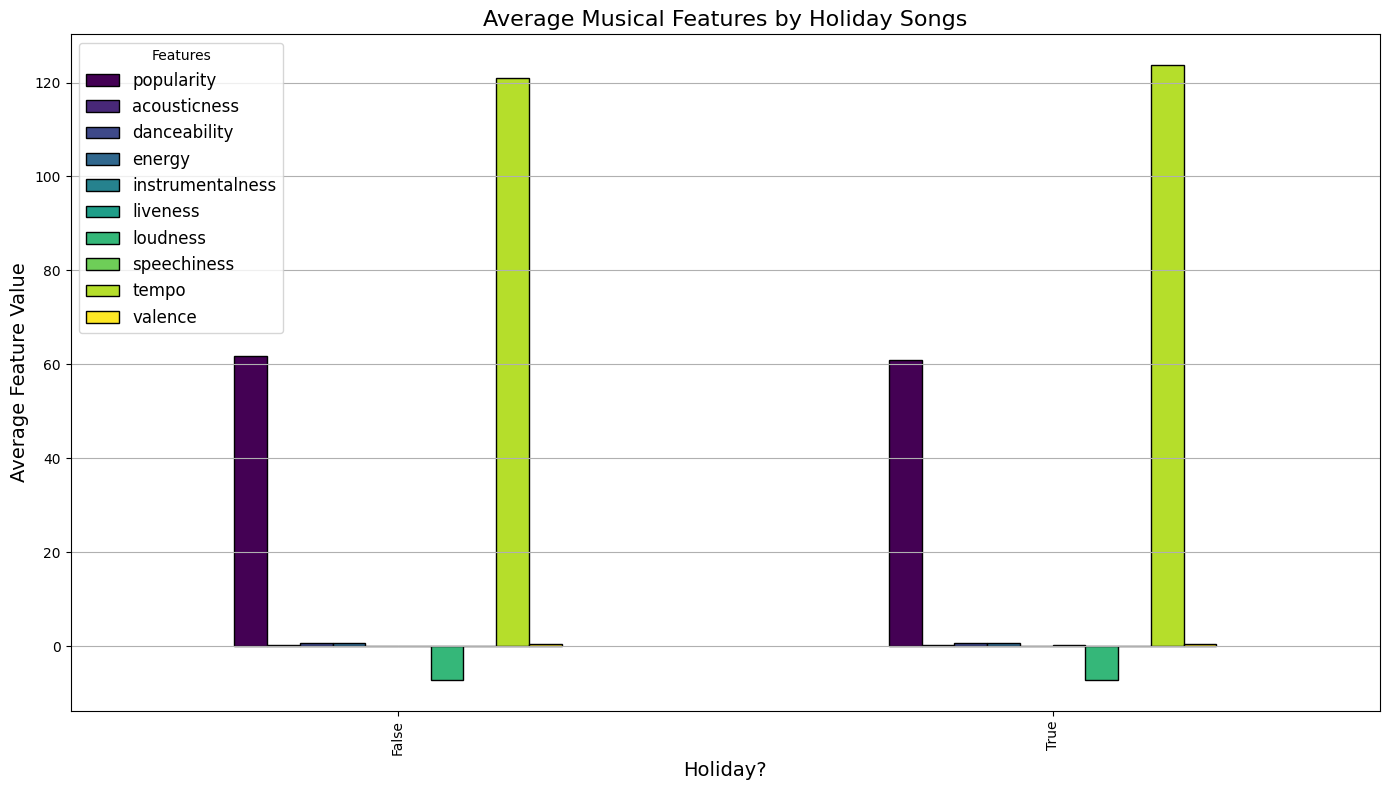

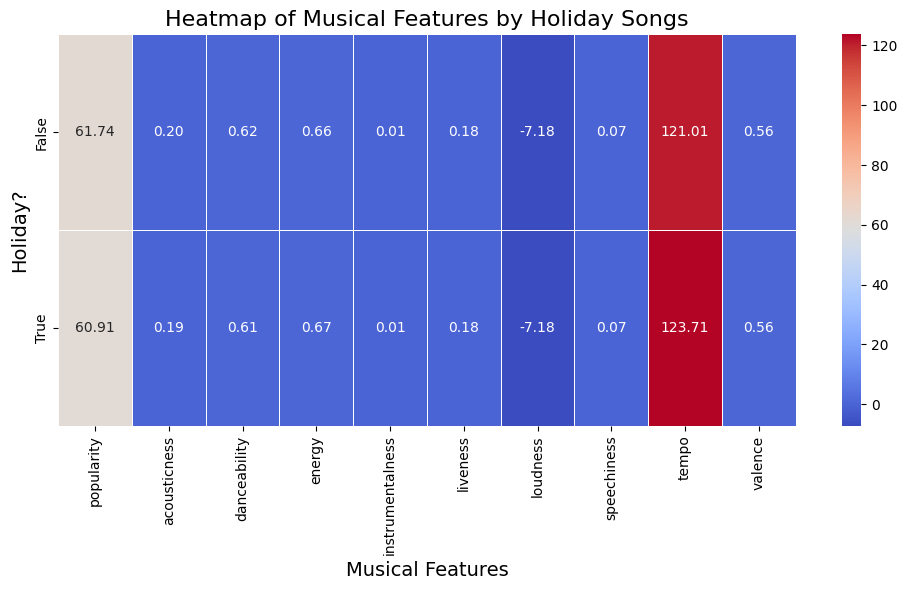

In [122]:
holiday_features = song_data.groupby('holiday_flag')[musical_features].mean()

# Visualize the features for each era
plt.figure(figsize=(14, 8))
holiday_features.plot(kind='bar', figsize=(14, 8),
                  colormap='viridis', edgecolor='black')
plt.title('Average Musical Features by Holiday Songs', fontsize=16)
plt.xlabel('Holiday?', fontsize=14)
plt.ylabel('Average Feature Value', fontsize=14)
plt.legend(title='Features', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Heatmap for a detailed view of feature variations
plt.figure(figsize=(10, 6))
sns.heatmap(holiday_features, annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Musical Features by Holiday Songs', fontsize=16)
plt.xlabel('Musical Features', fontsize=14)
plt.ylabel('Holiday?', fontsize=14)
plt.tight_layout()
plt.show()

Interesting! It appears that there isn't a major difference in musical features based on when the song is trending. I originally assumed that songs trending around the holiday time would have a higher valence, energy, and danceability than non-holiday times. However, the features are more or less the same. It appears that outside of the year/era a song is trending in, the monthly chart date does not contribute much to feature distribution.

Now that we have some idea of how our features interact with each other, let's get into the fun stuff.

# Machine Learning Methods

Based on our understanding of the data, we want to use machine learning techniques to analyze and predict key outcomes related to song popularity and their likelihood of charting. Before we get started, we want to create a class label to help our models classify songs based on their rank ranges (Top 10, Top 50, etc.)

## Label Creation

In [123]:
# Create rank categories for multi-class classification
def rank_category(rank):
    if rank == 1:
        return 0 # #1 Hits
    elif rank <= 10:
        return 1 # Top 10
    elif rank <= 50:
        return 2 # Top 50
    else:
        return 3 # Lower ranks
    
song_data['rank_category'] = song_data['rank'].apply(rank_category)
song_data

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,speechiness,tempo,time_signature,valence,chart_month,chart_day_of_week,chart_season,musical_era,holiday_flag,rank_category
0,usher,you make me wanna...,49,50.0,2,47,1998-07-11,69,0.0359,0.761,...,0.0539,164.088,4/4,0.922,7,Saturday,Summer,1990s,False,2
1,usher,you make me wanna...,50,48.0,2,46,1998-07-04,69,0.0359,0.761,...,0.0539,164.088,4/4,0.922,7,Saturday,Summer,1990s,True,2
2,usher,you make me wanna...,48,42.0,2,45,1998-06-27,69,0.0359,0.761,...,0.0539,164.088,4/4,0.922,6,Saturday,Summer,1990s,False,2
3,usher,you make me wanna...,42,39.0,2,44,1998-06-20,69,0.0359,0.761,...,0.0539,164.088,4/4,0.922,6,Saturday,Summer,1990s,False,2
4,usher,you make me wanna...,39,41.0,2,43,1998-06-13,69,0.0359,0.761,...,0.0539,164.088,4/4,0.922,6,Saturday,Summer,1990s,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227145,mint condition,you don't have to hurt no more,32,34.0,32,5,1997-04-26,35,0.0973,0.758,...,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False,2
227146,mint condition,you don't have to hurt no more,34,37.0,34,4,1997-04-19,35,0.0973,0.758,...,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False,2
227147,mint condition,you don't have to hurt no more,37,42.0,37,3,1997-04-12,35,0.0973,0.758,...,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False,2
227148,mint condition,you don't have to hurt no more,42,52.0,42,2,1997-04-05,35,0.0973,0.758,...,0.0287,113.897,4/4,0.479,4,Saturday,Spring,1990s,False,2


## Training and Testing Data Split

Let's also create our training and testing data. We will use 70% of the data for training and 30% for testing. The testing data will not include the 'rank', 'last-week', 'peak-rank', 'weeks-on-board', or 'rank category' columns. The model's job will be to determine the rank category for the song.

In [124]:
# Imports
from sklearn.model_selection import train_test_split

# Exclude columns not needed for for training/testing
excluded_columns = ['rank', 'last-week', 'peak-rank', 'weeks-on-board', 'rank_category']
feature_columns = [col for col in song_data.columns if col not in excluded_columns]

# Features (X) and labels (y)
X = song_data[feature_columns] # All features except excluded columns
y = song_data['rank_category'] # The target variable

# Split the data into training and testing stes (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Output the shapes of the datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (159005, 22)
Testing features shape: (68145, 22)
Training labels shape: (159005,)
Testing labels shape: (68145,)


In [125]:
# We can only use numeric features so let's make sure we are set
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)

artist_name                  object
track_name                   object
date                 datetime64[ns]
popularity                    int64
acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
key                          object
liveness                    float64
loudness                    float64
mode                         object
speechiness                 float64
tempo                       float64
time_signature               object
valence                     float64
chart_month                   int32
chart_day_of_week            object
chart_season                 object
musical_era                  object
holiday_flag                   bool
dtype: object
artist_name                  object
track_name                   object
date                 datetime64[ns]
popularity                    int64
acousticness                float64
danceability  

It looks like we have some objects and datetime types, which we can't use as input for a model. To start, we are going to drop non-numerical columns like artist name, track name, and data. Although I was initially against dropping the aritst name, there is a good reason. Taylor Swift doesn't get #1 hits because she's Taylor Swift. She does this because of the features her songs have. Otherwise, every song of hers would go #1. Instead, there is a formula behind her music that explains why some songs go #1 and others don't. The same can be said about any artist.

In [126]:
# Drop non numerical columns
X_train = X_train.drop(columns=['artist_name', 'track_name', 'date'])
X_test = X_test.drop(columns=['artist_name', 'track_name', 'date'])

# Convert categorical columns to numerical values using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['key', 'mode', 'time_signature', 'chart_day_of_week', 'chart_season', 'musical_era'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['key', 'mode', 'time_signature', 'chart_day_of_week', 'chart_season', 'musical_era'], drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0) # ensure alignment between testing and training data

X_train['holiday_flag'] = X_train['holiday_flag'].astype(int)
X_test['holiday_flag'] = X_test['holiday_flag'].astype(int)

print(X_train.dtypes)

popularity                      int64
acousticness                  float64
danceability                  float64
duration_ms                     int64
energy                        float64
instrumentalness              float64
liveness                      float64
loudness                      float64
speechiness                   float64
tempo                         float64
valence                       float64
chart_month                     int32
holiday_flag                    int64
key_A#                           bool
key_B                            bool
key_C                            bool
key_C#                           bool
key_D                            bool
key_D#                           bool
key_E                            bool
key_F                            bool
key_F#                           bool
key_G                            bool
key_G#                           bool
mode_Minor                       bool
time_signature_1/4               bool
time_signatu

In [127]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## Model Selection

Now that we have some labeled data, let's think about what type of models would help us answer the question. To reiterate the goal, we want to be able to predict what position a song will get on the charts base on its musical features. Essentially, what we are working with here is a multi-class classification task. 

Ideally, the model will take in an input of a song with its features and without the rank label. Then, it will analyze the features according to the time period it is in to determine where the song will fall on the charts. 

For this task, we will use a neural network. This appears to be ideal as they are highly flexible and are capable of modeling complex non-linear relationships, much like our dataset!

## Neural Network Architecture

1. Input Layer: This takes in all the musical features of the song and normalizes them

2. Hidden Layers: 2-3 layers with ReLU activation to model non-linear relationships

3. Output layer: One neuron per class (4 neurons for our rank categories)

4. Activation: Softmax (Good for multi-class classification problems (source: https://www.geeksforgeeks.org/the-role-of-softmax-in-neural-networks-detailed-explanation-and-applications/))

## Training the Model

In [128]:
# Imports for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [129]:
# Define the number of features and classes
input_dim = X_train.shape[1] # Number of input features
num_classes = len(y_train.unique()) # Number of chart ranks (Our 4 categories)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),  # Input layer + 1st hidden layer
    Dropout(0.3),  # Randomly disable 30% of the neruons to prevent overfitting
    
    Dense(64, activation='relu'),  # 2nd hidden layer
    BatchNormalization(),  # Normalize inputs to this layer
    Dropout(0.3),  # Randomly disable 30% of the neruons to prevent overfitting
    
    Dense(32, activation='relu'),  # 3rd hidden layer
    
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(
    optimizer = 'sgd', # stochastic gradient descent optimization algorithm
    loss='sparse_categorical_crossentropy', # for integer labels
    metrics=['accuracy'] # track accuracy
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 50, # number of passes through the dataset
    batch_size = 32, # number of samples per training batch
    validation_data = (X_test, y_test), # validation data for monitoring
    verbose=1 # show training progess
)



Epoch 1/50


/Users/royaparsa/Library/Mobile Documents/com~apple~CloudDocs/fall2024/csc-335/spotify-analyzer/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 556us/step - accuracy: 0.4341 - loss: 1.1232 - val_accuracy: 0.4518 - val_loss: 1.0584
Epoch 2/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 544us/step - accuracy: 0.4483 - loss: 1.0540 - val_accuracy: 0.4518 - val_loss: 1.0522
Epoch 3/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4501 - loss: 1.0481 - val_accuracy: 0.4555 - val_loss: 1.0524
Epoch 4/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 648us/step - accuracy: 0.4474 - loss: 1.0474 - val_accuracy: 0.4494 - val_loss: 1.0514
Epoch 5/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 617us/step - accuracy: 0.4479 - loss: 1.0478 - val_accuracy: 0.4590 - val_loss: 1.0520
Epoch 6/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 544us/step - accuracy: 0.4499 - loss: 1.0464 - val_accuracy: 0.4503 - val_loss: 1.0512
Epoch 7/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 567us/step - accuracy: 0.4510 - loss: 1.0483 - val_accuracy: 0.4549 - val_loss: 1.0518
Epoch 8/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 578us/step - accuracy: 0.4508 - loss: 1.0491

Now that our model is trained, we can evaluate it's performance on the test data and make predictions to see how well it works! Before we do that, let's understand what we did here:

Our neural network is composed of several layers:

* Input layer: receives the raw feature data

* 1st Hidden Layer: has 128 neurons which compute the weighted sum of the inputs and applies ReLU activation onto it to introduce non-linearity, allowing the network to learn complex patterns (Learned this from CSC 302!) We also disable 30% of neurons to prevent overfitting, forcing the model to generalize better and not relying on specific neurons.

* 2nd Hidden Layer: has 64 neurons, which helps the model generalize by focusing on the most important features. We still use ReLU activation here. Additionally, we are normalizing the outputs of the previous layer to have a mean of 0 and a stdev of 1. This improves our stability during training. We once again drop 30% of neurons

* 3rd Hidden Layer: 32 nuerons to extract high level generalizations

* Output layer: We have 4 neurons, one for each possible class. We use softmax activation to conver the outputs into probabilites for each class. Then, it ensures the sum of the probabilities across all classes equals 1. It will choose the class with the highest probability. 

We used stochastic gradient descent to optimize the model, but there are other options! Let's see what works best. Now... let's test it!

## Testing the Model

First, we are going to evaluate the accuracy of the model. Tensorflow is nice and gives us a method to do that.

In [130]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2130/2130 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 0.4509 - loss: 1.0503
Test Accuracy: 45.42%


It looks like our model's accuracies generally hover around 45%. Let's see if we can make some predictions with this before we try to increase this number! Similarly, tensor flow gives us some nice methods to make predictions easy.

In [131]:
# Generate predictions
predictions = model.predict(X_test)

# Convert probabilities to predicted class labels
predicted_classes = predictions.argmax(axis=1)

# Compare the first few predictions with the true labels
for i in range(10):
    print(f"Predicted: {predicted_classes[i]}, Actual: {y_test.iloc[i]}")

2130/2130 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step
Predicted: 2, Actual: 3
Predicted: 3, Actual: 2
Predicted: 3, Actual: 3
Predicted: 2, Actual: 2
Predicted: 3, Actual: 3
Predicted: 3, Actual: 3
Predicted: 2, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 2, Actual: 3


Let's also make a confusion matrix to visualize the accuracies across each class.

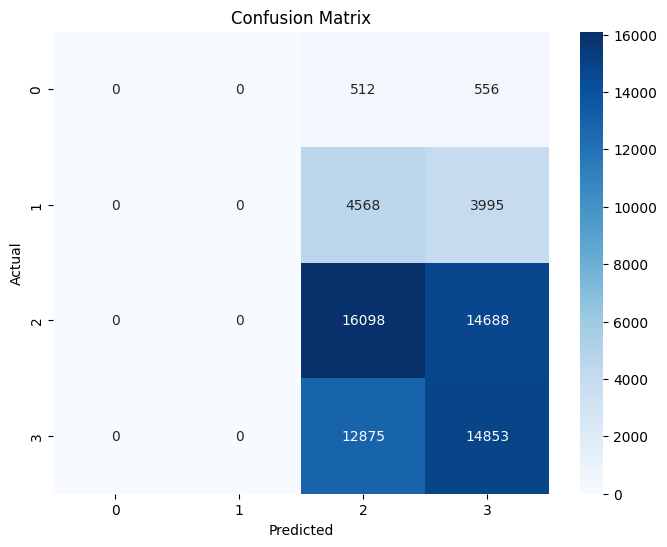

In [132]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [133]:
# Create a detailed classification report
report = classification_report(y_test, predicted_classes, target_names=[f'Class {i}' for i in range(num_classes)])
print(report)

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      1068
     Class 1       0.00      0.00      0.00      8563
     Class 2       0.47      0.52      0.50     30786
     Class 3       0.44      0.54      0.48     27728

    accuracy                           0.45     68145
   macro avg       0.23      0.26      0.24     68145
weighted avg       0.39      0.45      0.42     68145



/Users/royaparsa/Library/Mobile Documents/com~apple~CloudDocs/fall2024/csc-335/spotify-analyzer/tf-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/royaparsa/Library/Mobile Documents/com~apple~CloudDocs/fall2024/csc-335/spotify-analyzer/tf-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/royaparsa/Library/Mobile Documents/com~apple~CloudDocs/fall2024/csc-335/spotify-analyzer/tf-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: Undefined

Interestingly enough, we don't see any predictions of 0 or 1 in this confusion matrix. This is weird, since it should be doing this. One possible reason could be that song_data was originally in an ordered fashion (from rank 1 - 100) and therefore, the testing split of 30% might not have captured the other categories. Let's try changing how we define our testing and training data and doing this again!

### Training and Testing Data Split... Again

In [134]:
# Let's organize song_data by date to avoid rank order bias
# Ensure 'date' column is in datetime format
song_data['date'] = pd.to_datetime(song_data['date'])

# Sort the DataFrame by the 'date' column
song_data_sorted = song_data.sort_values(by='date').reset_index(drop=True)

# Display the first few rows to verify the sorting
song_data_sorted

,artist_name,track_name,rank,last-week,peak-rank,weeks-on-board,date,popularity,acousticness,danceability,...,speechiness,tempo,time_signature,valence,chart_month,chart_day_of_week,chart_season,musical_era,holiday_flag,rank_category
0,bobby darin,splish splash,3,NaN,3,1,1958-08-04,57,0.385,0.645,...,0.0393,147.768,4/4,0.965,8,Monday,Summer,1980s and Earlier,False,1
1,chuck berry,johnny b. goode,80,NaN,80,1,1958-08-04,73,0.748,0.522,...,0.0817,168.078,4/4,0.969,8,Monday,Summer,1980s and Earlier,False,3
2,the elegants,little star,18,NaN,18,1,1958-08-04,35,0.873,0.408,...,0.0300,72.615,4/4,0.697,8,Monday,Summer,1980s and Earlier,False,2
3,dion & the belmonts,i wonder why,47,NaN,47,1,1958-08-04,49,0.569,0.506,...,0.0348,103.463,4/4,0.901,8,Monday,Summer,1980s and Earlier,False,2
4,the everly brothers,all i have to do is dream,49,NaN,49,1,1958-08-04,65,0.839,0.534,...,0.0266,96.195,4/4,0.534,8,Monday,Summer,1980s and Earlier,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227145,jake owen,made for you,65,72.0,32,18,2021-07-03,59,0.762,0.541,...,0.0279,82.052,4/4,0.325,7,Saturday,Summer,2020s,False,3
227146,jake owen,made for you,83,65.0,32,19,2021-07-10,59,0.762,0.541,...,0.0279,82.052,4/4,0.325,7,Saturday,Summer,2020s,False,3
227147,jake owen,made for you,83,65.0,32,19,2021-07-10,60,0.762,0.541,...,0.0279,82.052,4/4,0.325,7,Saturday,Summer,2020s,False,3
227148,jake owen,made for you,86,83.0,32,20,2021-07-17,59,0.762,0.541,...,0.0279,82.052,4/4,0.325,7,Saturday,Summer,2020s,False,3


In [135]:
# Now let's make our new testing and training data!

# Features (X) and labels (y)
X = song_data_sorted[feature_columns] # All features except excluded columns
y = song_data_sorted['rank_category'] # The target variable

# Split the data into training and testing stes (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Output the shapes of the datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Drop non numerical columns
X_train = X_train.drop(columns=['artist_name', 'track_name', 'date'])
X_test = X_test.drop(columns=['artist_name', 'track_name', 'date'])

# Convert categorical columns to numerical values using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['key', 'mode', 'time_signature', 'chart_day_of_week', 'chart_season', 'musical_era'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['key', 'mode', 'time_signature', 'chart_day_of_week', 'chart_season', 'musical_era'], drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0) # ensure alignment between testing and training data

X_train['holiday_flag'] = X_train['holiday_flag'].astype(int)
X_test['holiday_flag'] = X_test['holiday_flag'].astype(int)

print(X_train.dtypes)

Training features shape: (159005, 22)
Testing features shape: (68145, 22)
Training labels shape: (159005,)
Testing labels shape: (68145,)
popularity                      int64
acousticness                  float64
danceability                  float64
duration_ms                     int64
energy                        float64
instrumentalness              float64
liveness                      float64
loudness                      float64
speechiness                   float64
tempo                         float64
valence                       float64
chart_month                     int32
holiday_flag                    int64
key_A#                           bool
key_B                            bool
key_C                            bool
key_C#                           bool
key_D                            bool
key_D#                           bool
key_E                            bool
key_F                            bool
key_F#                           bool
key_G                     

In [136]:
# Now, let's train our model on the new data again
history = model.fit(
    X_train, y_train,
    epochs = 50, # number of passes through the dataset
    batch_size = 32, # number of samples per training batch
    validation_data = (X_test, y_test), # validation data for monitoring
    verbose=1 # show training progess
)

Epoch 1/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step - accuracy: 0.4515 - loss: 1.0487 - val_accuracy: 0.4581 - val_loss: 1.0454
Epoch 2/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 545us/step - accuracy: 0.4558 - loss: 1.0456 - val_accuracy: 0.4475 - val_loss: 1.0461
Epoch 3/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 543us/step - accuracy: 0.4553 - loss: 1.0477 - val_accuracy: 0.4513 - val_loss: 1.0465
Epoch 4/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step - accuracy: 0.4533 - loss: 1.0480 - val_accuracy: 0.4350 - val_loss: 1.0470
Epoch 5/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 541us/step - accuracy: 0.4522 - loss: 1.0483 - val_accuracy: 0.4252 - val_loss: 1.0476
Epoch 6/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 540us/step - accuracy: 0.4479 - loss: 1.0492 - val_accuracy: 0.4535 - val_loss: 1.0464
Epoch 7/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 531us/step - accuracy: 0.4534 - loss: 1.0483 - val_accuracy: 0.4410 - val_loss: 1.0464
Epoch 8/50
4969/4969 ━━━━━━━━━━━━━━━━━━━━ 3s 531us/step - accuracy: 0.4524 -

In [137]:
# Evaluate the new model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2130/2130 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.4205 - loss: 1.0514
Test Accuracy: 42.13%


Our general predictivty went down, but let's see if we are guessing other classes now.

In [138]:
# Generate predictions
predictions = model.predict(X_test)

# Convert probabilities to predicted class labels
predicted_classes = predictions.argmax(axis=1)

# Compare the first few predictions with the true labels
for i in range(100):
    print(f"Predicted: {predicted_classes[i]}, Actual: {y_test.iloc[i]}")

2130/2130 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step
Predicted: 2, Actual: 3
Predicted: 3, Actual: 3
Predicted: 3, Actual: 2
Predicted: 3, Actual: 3
Predicted: 2, Actual: 3
Predicted: 2, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 1
Predicted: 3, Actual: 2
Predicted: 3, Actual: 3
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 0
Predicted: 2, Actual: 1
Predicted: 3, Actual: 3
Predicted: 2, Actual: 2
Predicted: 3, Actual: 2
Predicted: 2, Actual: 3
Predicted: 3, Actual: 2
Predicted: 2, Actual: 3
Predicted: 3, Actual: 1
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 1
Predicted: 3, Actual: 1
Predicted: 2, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 3
Predicted: 3, Actual: 2
Predicted: 3, Actual: 3
Predicted: 2, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 2
Predicted: 3, Actual: 3
Predicted: 2, Actual: 3
Predicted: 3, Actual: 3
Predicted: 3, Actua

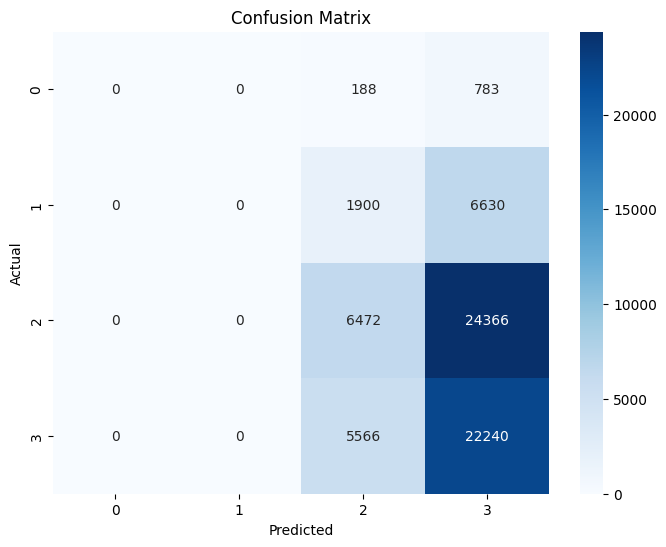

In [139]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Since the model is only predicting 2 or 3 as class labels despite fixing the data distribution, there might be a class imbalance. Even though we shuffled the data, there could still be an imbalance. For example, there might be more classes in 2 and 3 compared to others. Let's check class distribution.

### Weights?

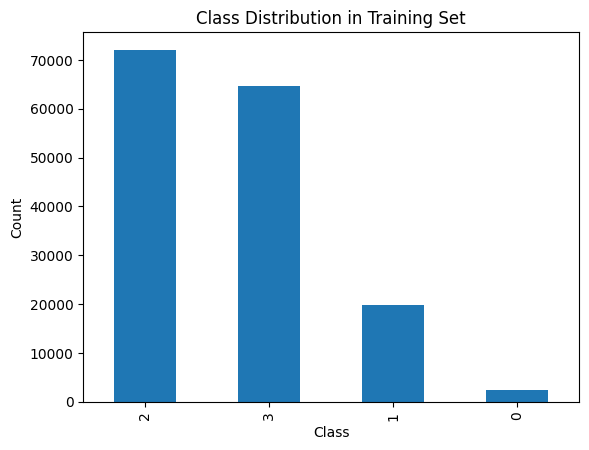

In [140]:
y_train.value_counts().plot(kind='bar', title='Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Woaaah. There's a significant class imbalance problem! Classes 2 and 3 dominate the dataset and explain why the model is being more biased towards predicting these classes. Let's assign weights to the classes so the model penalizes missclassifications of 0 and 1 more heavily.

In [141]:
np.unique(y_train)

array([0, 1, 2, 3])

In [142]:
# Import
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Conver this to a dictionary for keras
weights = dict(enumerate(class_weights))
weights

{0: np.float64(16.351809954751133),
 1: np.float64(2.0103803165933343),
 2: np.float64(0.5515338402197741),
 3: np.float64(0.6141370679932641)}

### Retraining with Weights

In [143]:
# As we can see, classes 0 and 1 are weighed much more heavily than 2 and 3. Now, let's train the model with class weights!

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=weights,  # Use corrected class weights
    verbose=1
)

KeyError: 4